# Überblick

Die **logistische Regression** ist ein einfaches statistisches Modell, das verwendet wird, um **binäre** Klassifikationsprobleme zu lösen
- bedeutet: die Zielvariable hat nur zwei mögliche Ausprägungen
  z. B. Ja/Nein, 0/1, Erfolg/Misserfolg...


Sie eignet sich besonders für Probleme, bei denen die Wahrscheinlichkeiten eines bestimmten Ergebnisses modelliert werden sollen.
Sie hat den Vorteil, dass sie leicht interpretierbar ist und Wahrscheinlichkeiten statt nur Kategorien ausgibt, was in vielen Anwendungen wertvoll ist.

---
# Statistische Grundlagen

Die logistische Regression basiert auf der Annahme, dass der **log-transformierte** Wert der Zielvariable durch eine lineare Kombination der Prädiktoren erklärt werden kann. Der **Log** ist der natürliche Logarithmus der Wahrscheinlichkeit eines Ergebnisses geteilt durch die Gegenwahrscheinlichkeit:

$$
 \log\left( \frac{p}{1-p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... 
$$

Dabei ist $p$ die Wahrscheinlichkeit, dass das Ereignis eintritt (z. B. $p = P(Y = 1)$).

Um diese Wahrscheinlichkeit $p$ zu berechnen, verwendet man die **logistische Funktion**, die $p$ aus dem logit-Wert zurückgewinnt:

$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \dots + \beta_nx_n)}}
$

Dies sorgt dafür, dass die vorhergesagte Wahrscheinlichkeit $p$ immer zwischen 0 und 1 liegt.

---
# Anwendungsbeispiele

Ein klassisches Beispiel für die Anwendung der logistischen Regression ist die **Kreditanalyse**, bei der entschieden wird, ob ein Kreditnehmer als **kreditwürdig (1)** oder **nicht kreditwürdig (0)** eingestuft wird, basierend auf Merkmalen wie Einkommen, Schulden und Beschäftigungsdauer.

Ein weiteres Beispiel ist die **Medizin**: Vorhersage, ob ein Patient eine bestimmte Krankheit hat, basierend auf diagnostischen Tests und Patientendaten.

---
# Interpretation der Koeffizienten

Die Koeffizienten ($\beta_1, \beta_2, \dots$) können wie in einer linearen Regression interpretiert werden, aber auf den **Logit**. Um den Einfluss einer unabhängigen Variable auf die Wahrscheinlichkeit zu interpretieren, kann man den Exponentialwert der Koeffizienten berechnen:

$
\text{OR} = e^{\beta_i}
$

Das gibt den **Odds Ratio (OR)** an, das Verhältnis der Wahrscheinlichkeit, dass das Ereignis eintritt, zu der Wahrscheinlichkeit, dass es nicht eintritt. Ein OR von 1 bedeutet, dass die unabhängige Variable keinen Einfluss hat, ein OR größer als 1 bedeutet, dass die Wahrscheinlichkeit steigt, und ein OR kleiner als 1 bedeutet, dass sie sinkt.

---
# Visualisierung

Es ist üblich, die logistische Funktion zu visualisieren, um zu zeigen, wie sie die Wahrscheinlichkeiten in einer S-förmigen Kurve modelliert. Hier ist ein Beispiel einer solchen Kurve:

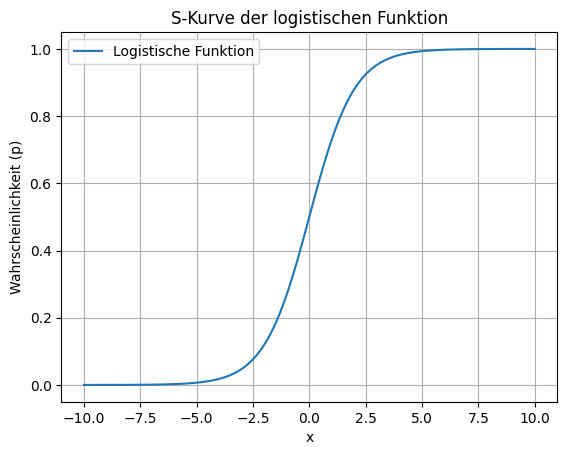

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Logistische Funktion
def logistic(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = logistic(x)

plt.plot(x, y, label='Logistische Funktion')
plt.title('S-Kurve der logistischen Funktion')
plt.xlabel('x')
plt.ylabel('Wahrscheinlichkeit (p)')
plt.legend()
plt.grid(True)
plt.show()

Diese Grafik zeigt die S-Kurve, die typischerweise bei der logistischen Regression auftritt: Für große negative Werte von $x$ nähert sich die Wahrscheinlichkeit $0$, für große positive Werte nähert sie sich $1$.

---
# Anwendung und Evaluierung

Ein wichtiger Schritt bei der Anwendung der logistischen Regression ist die Evaluierung des Modells. Übliche Metriken sind:
- **Konfusionsmatrix**: Zeigt wahre positive/negative und falsch positive/negative Vorhersagen.
- **ROC-Kurve (Receiver Operating Characteristic)**: Visualisiert die Leistung eines binären Klassifikators durch das Verhältnis von **Sensitivität** und **Spezifität**.
- **AUC (Area Under the Curve)**: Ein Maß für die Genauigkeit des Modells; Werte nahe 1 deuten auf ein gutes Modell hin.

# Beispiel: Lernstunden vs. Prüfungserfolg

In folgendem Beispiel wird die logistische Regression verwendet, um zu modellieren, wie die Anzahl der Lernstunden die Wahrscheinlichkeit beeinflusst, dass ein Student eine Prüfung besteht.

Genauigkeit: 0.5
Verwirrungsmatrix:
 [[0 1]
 [0 1]]
Vorhergesagte Wahrscheinlichkeiten (Sigmoid-Ausgabe) für Klasse 1:
 [0.9998346  0.50001381]


C:\Users\Jens-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


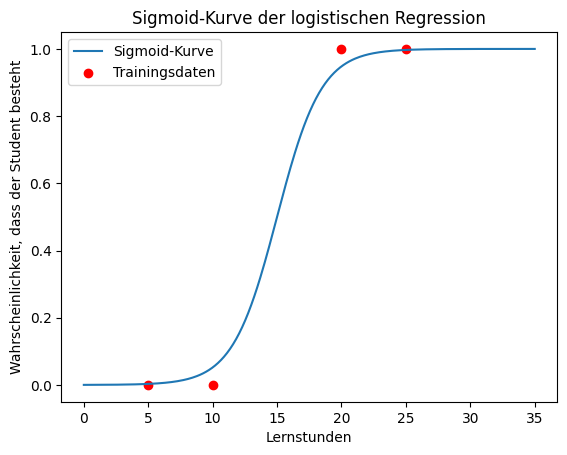

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Beispieldatensatz: Vorhersage, ob ein Student besteht (1) oder nicht besteht (0) basierend auf den Lernstunden
data = pd.DataFrame({
    'Lernstunden': [5, 10, 15, 20, 25, 30],
    'Bestehen': [0, 0, 0, 1, 1, 1]
})

# Unabhängige und abhängige Variablen
X = data[['Lernstunden']]
y = data['Bestehen']

# Training-Test-Aufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistisches Regressionsmodell
log_model = LogisticRegression() # ein neues logistisches Regressionsmodell wird erstellt
log_model.fit(X_train, y_train) # das Modell wird mit den Trainingsdaten trainiert, um die Beziehung zwischen Lernstunden und Bestehen zu lernen

# Vorhersagen
y_pred = log_model.predict(X_test)

# Auswertung
print("Genauigkeit:", accuracy_score(y_test, y_pred))
print("Verwirrungsmatrix:\n", confusion_matrix(y_test, y_pred))


# Wahrscheinlichkeiten (Sigmoid-Ausgabe)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für Klasse 1


# Ausgabe der Wahrscheinlichkeiten
print("Vorhergesagte Wahrscheinlichkeiten (Sigmoid-Ausgabe) für Klasse 1:\n", y_pred_proba)

# Sigmoid-Kurve visualisieren
X_vals = np.linspace(0, 35, 300).reshape(-1, 1)
y_sigmoid = log_model.predict_proba(X_vals)[:, 1]

plt.plot(X_vals, y_sigmoid, label='Sigmoid-Kurve')
plt.scatter(X_train, y_train, color='red', label='Trainingsdaten')
plt.xlabel('Lernstunden')
plt.ylabel('Wahrscheinlichkeit, dass der Student besteht')
plt.title('Sigmoid-Kurve der logistischen Regression')
plt.legend()
plt.show()



## Erklärung des Codes

1. **Datenaufbereitung**:
   - Die Daten sind ein einfacher Datensatz mit zwei Variablen: `Lernstunden` (wie viele Stunden ein Student lernt) und `Bestehen` (ob der Student die Prüfung bestanden hat: 1 für "ja" und 0 für "nein").
   - Der Datensatz wird in unabhängige Variable $ X $ (Lernstunden) und abhängige Variable $ y $ (Bestehen) aufgeteilt.

2. **Train-Test-Split**:
   - Die Daten werden in Trainings- und Testdaten aufgeteilt. 80 % der Daten werden für das Training und 20 % für das Testen verwendet.

3. **Logistisches Regressionsmodell**:
   - Ein **Logistisches Regressionsmodell** wird erstellt und mit den Trainingsdaten trainiert, um die Beziehung zwischen den Lernstunden und der Wahrscheinlichkeit des Bestehens zu lernen.

4. **Vorhersagen und Evaluierung**:
   - Das trainierte Modell wird verwendet, um Vorhersagen für die Testdaten zu machen.
   - Die Genauigkeit und die **Verwirrungsmatrix (confusion matrix)** werden ausgegeben, um die Leistung des Modells zu evaluieren.
     - Genauigkeit gibt den Anteil der richtig klassifizierten Werte an.
     - Die Verwirrungsmatrix zeigt, wie oft das Modell richtig und falsch klassifiziert hat (wahre Positive, wahre Negative, falsche Positive, falsche Negative).

5. **Wahrscheinlichkeiten**:
   - Anstatt nur zu sagen, ob ein Student besteht oder nicht, berechnet das Modell auch die Wahrscheinlichkeiten, dass ein Student besteht (die Ausgabe der Sigmoid-Funktion).


## Visualisierung der Sigmoid-Kurve

Die Sigmoid-Kurve zeigt, dass die Wahrscheinlichkeit des Bestehens bei geringer Anzahl von Lernstunden sehr niedrig ist (nahe 0), aber mit zunehmender Anzahl von Lernstunden stark ansteigt und sich bei höheren Werten der Lernstunden der Wahrscheinlichkeit 1 nähert.

Diese Art der Visualisierung ist nützlich, um zu verstehen, wie die logistische Regression ein binäres Klassifikationsproblem in Wahrscheinlichkeiten umwandelt und wie sich diese Wahrscheinlichkeit verändert, wenn die Eingabedaten (hier die Lernstunden) variieren.
